In [2]:
%load_ext autoreload
%autoreload 2


# Facility location problems examples #

In the following, a couple of examples discusses in the course will be presented.
The basic instructions to use the optimization software are provided.

**The software is meant for didactic purposes only.**

*v1.4 - 2024-04-04*


Import the data of the scenario 1 and the optimization function (netopt)
Press shift + enter in each cell to run the commands, or click on Run in the command bar

In [18]:
from netopt import netopt, print_solution, plot_map, print_dict
from data.scenario_1 import warehouses, customers
from data_structures import show_data, show_geo_map, calculate_dm, set_demand, set_capacity, set_all_capacities

Compute the linear distances using the geographical coordinates (longitude and latitude) of the locations

In [4]:
distance = calculate_dm(warehouses, customers, use_haversine=True)

**Plot the data**

You can control the colors and shapes in the plot using the following parameters (also in the netopt function):
- warehouse_marker=shape of the warehouse icons. Allowed values are s=square, o=circle, *=star, ^=triangle, v=inverted triangle. Default is s 
- warehouse_markercolor=color of the warehouse icons. Allowed values are red, green, blue, black, yellow. Default is red
- warehouse_markersize=size of the warehouse icons. Default is 4
- warehouse_active_markersize=size of the warehouse icons representing active (open) warehouses. Default is 5
- customer_marker=shape of the customer icons. Default is o
- customer_markercolor=color of the customer icons. Default is blue
- customer_markersize=size of the customer icons. Default is 4

If you don't specify the above parameters about the figures, the default values will be assumed

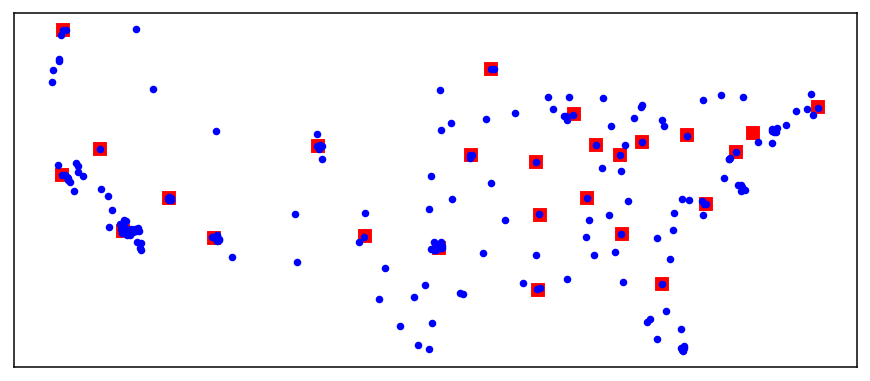

In [5]:
plot_map(customers=customers,
         warehouses=warehouses,
         warehouse_marker='s',
         warehouse_markercolor='red',
         warehouse_markersize=6,
         customer_marker='o',
         customer_markercolor='blue',
         customer_markersize=3)

A better map can be shown using the following command. However, this map allows only for the
visualization of location. To show the connections in the final solution you should use the plot_map command

In [6]:
show_geo_map(customers=customers, warehouses=warehouses, zoom=4)

**Get the optmimal location of num_warehouses warehouses**

You can change the value of parameter num_warehouses to test different scenario.
The parameter warehouses, customers, and distance are loaded in the previous cell.
You must define the objective: the objective mindistance minimizes the average weighted distance.
By setting the parameter plot to True, the function returns a simplyfied picture of the solution along with a summary of the performance. 
If you don't want the picture, set plot to False.

If you set hide_inactive to True the plot would not show inactive warehouses.
Outflow in the results represents the quantity exiting from each warehouse.


CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 523.0

Open warehouses:
ID:   8 City: Dallas               State: TX     Num. customers:  58  Outflow:  20385874.0 units
ID:   3 City: Baltimore            State: MD     Num. customers:  74  Outflow:  33753054.0 units
ID:  14 City: Los Angeles          State: CA     Num. customers:  68  Outflow:  23887405.0 units

Total outflow: 78026333.0 units
% of demand in range     0 - 99999: 100.0
Most distant customer is at 1555.5454338274894
Average customers distance (no weights): 585.3153539018147


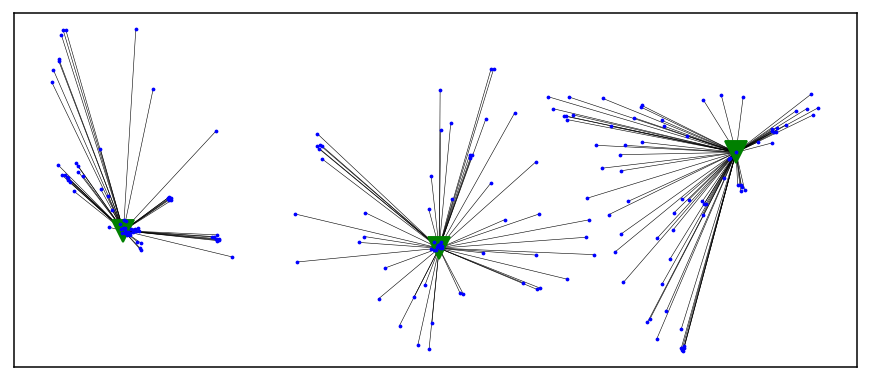

In [7]:
results = netopt(num_warehouses=3,  # this is the p parameter in the p-median problem
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

**Service levels**

By adding the parameter distance_ranges the functions returns the % of the demand within the passed distance ranges. 
For example, if distance_ranges = [0, 100, 200] the functions return the percentage of demand in the ranges [0, 100], (100, 200], (200, 99999]
where 99999 is used to represent a very long distance (i.e. infinite distance).

By changing the parameter num_warehouses and distance_ranges you can test different scenarios.
The parameter distance_ranges must be a list of increasing numbers. If you do not pass 0 as the first value
it will be automatically added


CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 146.0

Open warehouses:
ID:   1 City: Allentown            State: PA     Num. customers:  15  Outflow:  13248371.0 units
ID:   2 City: Atlanta              State: GA     Num. customers:   8  Outflow:   1936930.0 units
ID:   4 City: Boston               State: MA     Num. customers:   5  Outflow:   1481189.0 units
ID:   5 City: Chicago              State: IL     Num. customers:   9  Outflow:   4682553.0 units
ID:   7 City: Columbus             State: OH     Num. customers:   8  Outflow:   3178702.0 units
ID:   8 City: Dallas               State: TX     Num. customers:  21  Outflow:  10114723.0 units
ID:   9 City: Denver               State: CO     Num. customers:   6  Outflow:   1746913.0 units
ID:  10 City: Indianapolis         State: IN     Num. customers:   6  Outflow:   2575378.0 units
ID:  11 City: Jacksonville         State: FL     Num. customers:  13  Outflow:   3394939.0 units
I

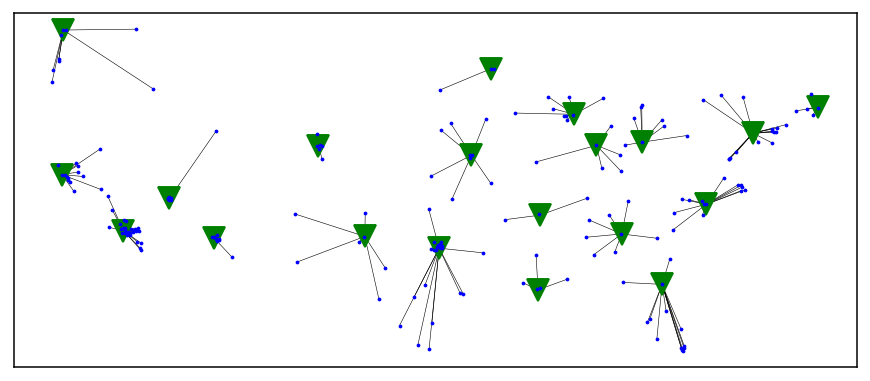

In [8]:
results = netopt(num_warehouses=20,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 distance_ranges=[0, 100, 400, 800, 3200],
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

The results variable contains a summary of the optimization report

In [9]:
print(results)

{'objective_value': 145.6169971251241, 'avg_weighted_distance': 145.616997125124, 'active_warehouses_id': {1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 21, 23, 24, 26}, 'active_warehouses_name': ['Allentown', 'Atlanta', 'Boston', 'Chicago', 'Columbus', 'Dallas', 'Denver', 'Indianapolis', 'Jacksonville', 'Kansas City', 'Las Vegas', 'Los Angeles', 'Memphis', 'Minneapolis', 'New Orleans', 'Phoenix', 'Raleigh', 'San Francisco', 'Seattle', 'Lubbock - Current WH'], 'most_distant_customer': 765.375830506332, 'demand_perc_by_ranges': {(0, 100): 0.4558389281218688, (100, 400): 0.4747904018506163, (400, 800): 0.06937067002751494, (800, 3200): 0.0, (3200, 99999): 0.0}, 'avg_customer_distance': 164.0365339094097, 'multi_sourced_customers': [], 'customers_assignment': [{'Warehouse': 'Allentown', 'Warehouse_id': 1, 'Customer': 'Alexandria', 'Customer_id': 3, 'Customer Demand': 147786, 'Distance': 241.83918430658306, 'Warehouse Latitude': 40.602812, 'Warehouse Longitude': -75.470433, 'Cus

For a slightly better visualization of the results use print_solution as follows

In [10]:
print_solution(results)

{   'active_warehouses_id': {   1,
                                2,
                                4,
                                5,
                                7,
                                8,
                                9,
                                10,
                                11,
                                12,
                                13,
                                14,
                                15,
                                16,
                                18,
                                19,
                                21,
                                23,
                                24,
                                26},
    'active_warehouses_name': [   'Allentown',
                                  'Atlanta',
                                  'Boston',
                                  'Chicago',
                                  'Columbus',
                                  'Dallas',
               

**Force warehouses open or close**

It is also possible to force warehouses to be open (for example, to force using the current warehouse)
or closed (to avoid the selection of some candidate).

The warehouses are references through their id, and must be passed as list [] (even for a single value, that is
to force closed the warehouse with id 1 you should pass force_closed=[1])

The id of the warehouses can be found in the 'warehouses' variable using the *show_data()* method.


In [17]:
show_data(warehouses)

|    |   Id | Identifier           | City          |   Latitude |   Longitude | Capacity   |   Yearly fixed cost |
|---:|-----:|:---------------------|:--------------|-----------:|------------:|:-----------|--------------------:|
|  0 |    1 | Allentown            | Allentown     |    40.6028 |    -75.4704 |            |                   0 |
|  1 |    2 | Atlanta              | Atlanta       |    33.7537 |    -84.3895 |            |                   0 |
|  2 |    3 | Baltimore            | Baltimore     |    39.2944 |    -76.6227 |            |                   0 |
|  3 |    4 | Boston               | Boston        |    42.361  |    -71.0534 |            |                   0 |
|  4 |    5 | Chicago              | Chicago       |    41.8833 |    -87.6247 |            |                   0 |
|  5 |    6 | Cincinnati           | Cincinnati    |    39.1066 |    -84.4997 |            |                   0 |
|  6 |    7 | Columbus             | Columbus      |    39.9914 |    -83.001  | 

CHECK INPUTS...OK
BUILD MODEL...Forcing open warehouses: [1]
Forcing closed warehouses: [8, 3]
OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 549.0

Open warehouses:
ID:   1 City: Allentown            State: PA     Num. customers:  41  Outflow:  21562167.0 units
ID:  14 City: Los Angeles          State: CA     Num. customers:  76  Outflow:  26802103.0 units
ID:  15 City: Memphis              State: TN     Num. customers:  83  Outflow:  29662063.0 units

Total outflow: 78026333.0 units
% of demand in range     0 -   100: 13.7
% of demand in range   100 -   400: 24.2
% of demand in range   400 -   800: 42.0
% of demand in range   800 -  3200: 20.1
% of demand in range  3200 - 99999: 0.0
Most distant customer is at 1555.5454338274894
Average customers distance (no weights): 613.0400019894345


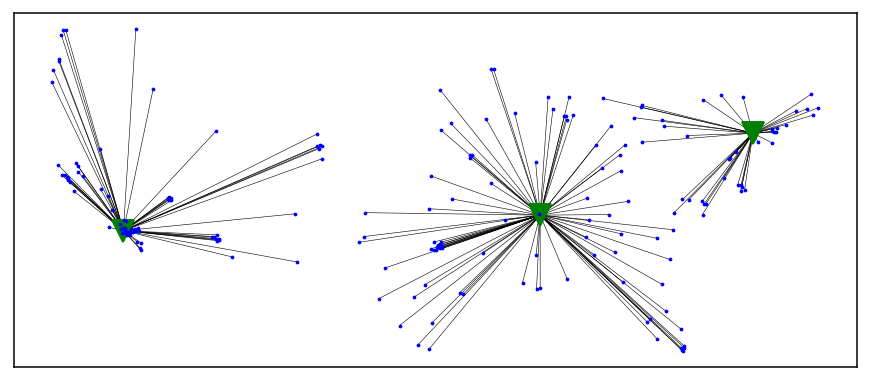

In [65]:
results = netopt(num_warehouses=3,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 force_open=[1],
                 force_closed=[8, 3],
                 distance_ranges=[0, 100, 400, 800, 3200],
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

**Covering problem**

The objective maxcover maximises the % of demand within a distance specified by the high_service_distance parameter. 
If you set the objective to maxcover and don't specify the high_service_distance parameter you'll get an error.

You should also set hide_flows to True to avoid the display of the allocations of customers to warehouses.

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
% covered demand within 800 distance: 95.9%

Open warehouses:
ID:   1 City: Allentown            State: PA     Num. customers:  35  Outflow:  19337722.0 units
ID:  11 City: Jacksonville         State: FL     Num. customers:  24  Outflow:   6419934.0 units
ID:  13 City: Las Vegas            State: NV     Num. customers:  68  Outflow:  23887405.0 units
ID:  25 City: St. Louis            State: MO     Num. customers:  38  Outflow:  13727796.0 units
ID:  26 City: Lubbock              State: TX     Num. customers:  35  Outflow:  14653476.0 units

Total outflow: 78026333.0 units
% of demand in range     0 -   100: 6.3
% of demand in range   100 -   400: 35.6
% of demand in range   400 -   800: 53.9
% of demand in range   800 -  3200: 4.1
% of demand in range  3200 - 99999: 0.0
Most distant customer is at 1625.9608476350618
Average customers distance (no weights): 488.093475733182
PLOTTING RADIUS 800...


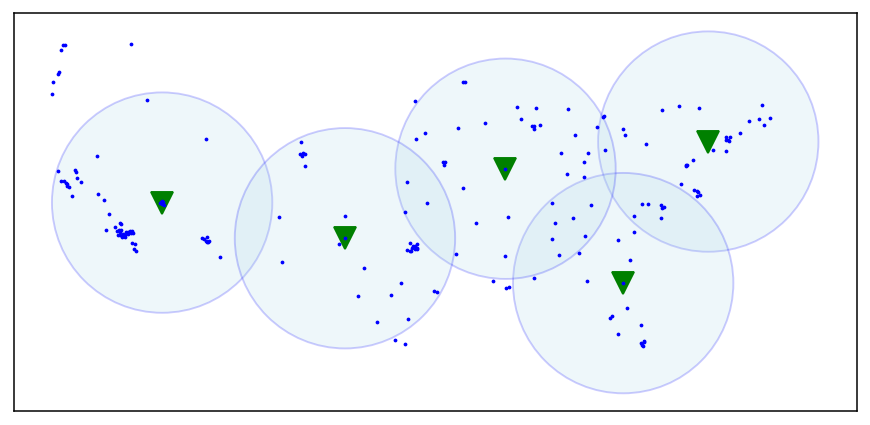

In [66]:
results = netopt(num_warehouses=5,
                 objective='maxcover',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 high_service_distance=800,
                 avg_service_distance=5000,
                 distance_ranges=[0, 100, 400, 800, 3200],
                 force_open=[],
                 force_closed=[],
                 plot=True,
                 hide_inactive=True,
                 hide_flows=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

#print_solution(results)


**Feel free to play with the parameters. If you find any error, please report it to me.**

If you know a little bit of python (or you are willing to learn a little bit), 
you can easily automate experiments.
For example, compute the average weighted distance for several values of *p*


In [11]:
for p in [1, 2, 3, 4, 5]:
    results = netopt(num_warehouses=p,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 force_open=[],
                 force_closed=[],
                 plot=False)
    print()
    print(f"*** AVG WEIGHTED DISTANCE FOR p={p}: {results['avg_weighted_distance']} ***")
    print()


CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 1462.0

Open warehouses:
ID:  12 City: Kansas City          State: MO     Num. customers: 200  Outflow:  78026333.0 units

Total outflow: 78026333.0 units
% of demand in range     0 - 99999: 100.0
Most distant customer is at 2427.185209302748
Average customers distance (no weights): 1456.942145583644

*** AVG WEIGHTED DISTANCE FOR p=1: 1462.4128074741018 ***

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 761.0

Open warehouses:
ID:   6 City: Cincinnati           State: OH     Num. customers: 120  Outflow:  50347487.0 units
ID:  14 City: Los Angeles          State: CA     Num. customers:  80  Outflow:  27678846.0 units

Total outflow: 78026333.0 units
% of demand in range     0 - 99999: 100.0
Most distant customer is at 1920.8670956722476
Average customers distance (no weights): 769.364789099606

*** AVG WEIGHTED DISTANCE FOR p=2: 

You can collect data from different experiments and the plot it.

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 1462.0

Open warehouses:
ID:  12 City: Kansas City          State: MO     Num. customers: 200  Outflow:  78026333.0 units

Total outflow: 78026333.0 units
% of demand in range     0 - 99999: 100.0
Most distant customer is at 2427.185209302748
Average customers distance (no weights): 1456.942145583644
CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 761.0

Open warehouses:
ID:   6 City: Cincinnati           State: OH     Num. customers: 120  Outflow:  50347487.0 units
ID:  14 City: Los Angeles          State: CA     Num. customers:  80  Outflow:  27678846.0 units

Total outflow: 78026333.0 units
% of demand in range     0 - 99999: 100.0
Most distant customer is at 1920.8670956722476
Average customers distance (no weights): 769.364789099606
CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted dist

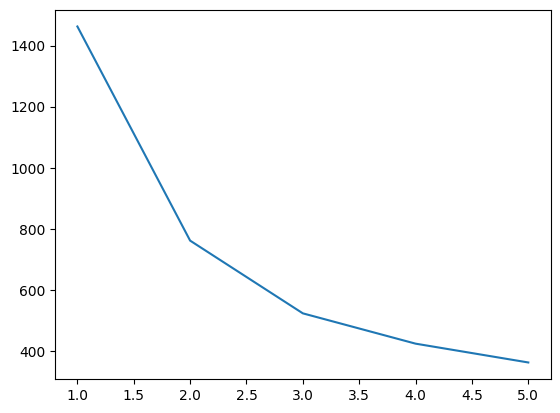

In [12]:
data = {}
for p in [1, 2, 3, 4, 5]:
    results = netopt(num_warehouses=p,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 force_open=[],
                 plot=False)
    data[p] = results['avg_weighted_distance']
    
# Plot the results
import matplotlib.pyplot as plt
plt.plot(data.keys(), data.values())

# Adding capacity #

Import the data for the problem with capacities

In [19]:
from data.scenario_5 import warehouses, customers

Compute the distance matrix

In [20]:
distance = calculate_dm(warehouses, customers, use_haversine=True)

In [21]:
show_geo_map(customers=customers, warehouses=warehouses, zoom=4)

Solve a p-median problem excluding the capacities: since the warehouses have the *capacity* attributes set, we need to instruct the solver to skip such an attribute in solvgin the problem by settin *force_uncapacitated=True*).

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 276.0

Open warehouses:
ID: 164 City: Santos               State: Brazil Num. customers:   4  Outflow:  41545912.0 units
ID:   5 City: Anápolis             State: Brazil Num. customers:   6  Outflow:   7986478.0 units
ID:  19 City: Belém                State: Brazil Num. customers:   5  Outflow:   7267529.0 units
ID: 147 City: Recife               State: Brazil Num. customers:   7  Outflow:  17936334.0 units
ID:  94 City: Juiz de Fora         State: Brazil Num. customers:   3  Outflow:  23930340.0 units

Total outflow: 98666593.0 units
% of demand in range     0 -   800: 92.4
% of demand in range   800 -  1200: 5.0
% of demand in range  1200 - 99999: 2.6
Most distant customer is at 2158.8019387391596
Average customers distance (no weights): 523.6736902115457


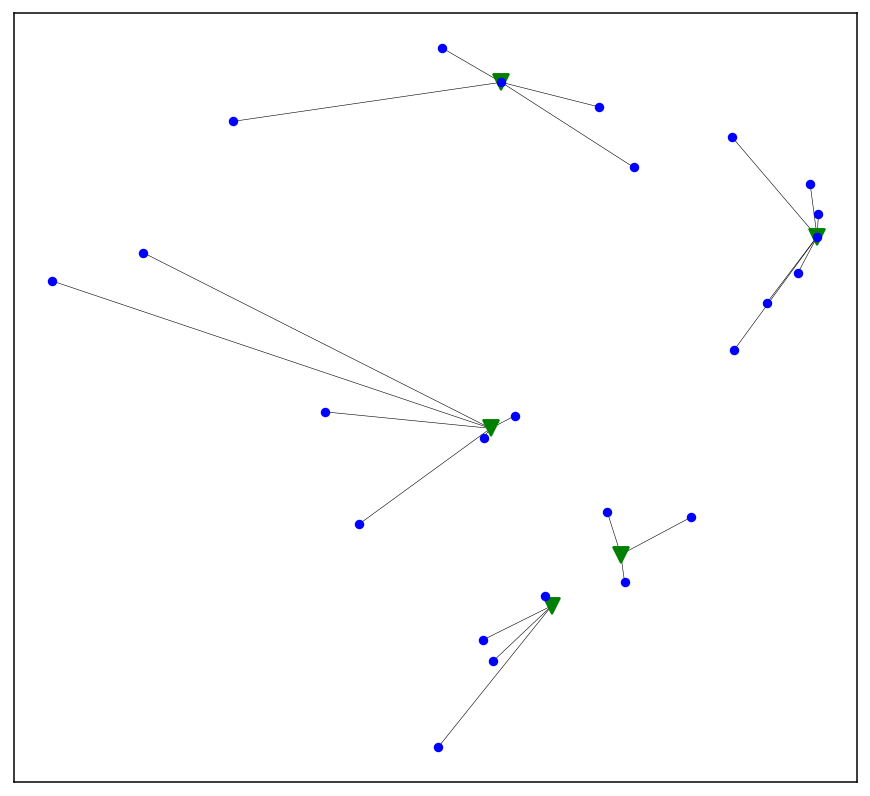

{   'active_warehouses_id': {164, 5, 19, 147, 94},
    'active_warehouses_name': [   'Santos',
                                  'Anápolis',
                                  'Belém',
                                  'Recife',
                                  'Juiz de Fora'],
    'avg_customer_distance': 523.6736902115457,
    'avg_weighted_distance': 276.45772598217405,
    'customers_assignment': [   {   'Customer': 'Goiás Region',
                                    'Customer Demand': 2559855,
                                    'Customer_id': 11,
                                    'Customers Latitude': -16.72,
                                    'Customers Longitude': -49.26,
                                    'Distance': 54.7823545982479,
                                    'Warehouse': 'Anápolis',
                                    'Warehouse Latitude': -16.32,
                                    'Warehouse Longitude': -48.96,
                                    'Warehouse_i

In [23]:
results = netopt(num_warehouses=5,
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 objective='mindistance',
                 force_uncapacitated=True,
                 distance_ranges=[0, 800, 1200],
                 plot=True,
                 warehouse_markersize=5,
                 warehouse_active_markersize=8,
                hide_inactive=True)
print_dict(results)

We would like to spread the quantity more evenly
Let's limit the capacity of the five warehouses to 1/5 of the total demand

In [24]:
set_all_capacities(warehouses, 20_000_000)

Solve again a mindistance problem with capacities, enforcing the single sourcing constraint. This constraint is implicit, you don't need to change anything.

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Infeasible
********* ERROR: Model not feasible, don't use results.
Average weighted distance: 292.0

Open warehouses:
ID:  19 City: Belém                State: Brazil Num. customers:   7  Outflow: 7657216.6191879 units
ID: 147 City: Recife               State: Brazil Num. customers:   7  Outflow: 17395294.0994562 units

Total outflow: 25052510.718644097 units
% of demand in range     0 -   800: 92.5
% of demand in range   800 -  1200: 5.3
% of demand in range  1200 - 99999: 2.1
Most distant customer is at 2337.1016096586054
Average customers distance (no weights): 572.8930969875707

Customers served by more than one warehouse
- Customer 1 is served by 2 warehouses
- Customer 2 is served by 2 warehouses
- Customer 3 is served by 2 warehouses
- Customer 4 is served by 2 warehouses
- Customer 5 is served by 3 warehouses
- Customer 6 is served by 4 warehouses
- Customer 9 is served by 4 warehouses
- Customer 11 is served by

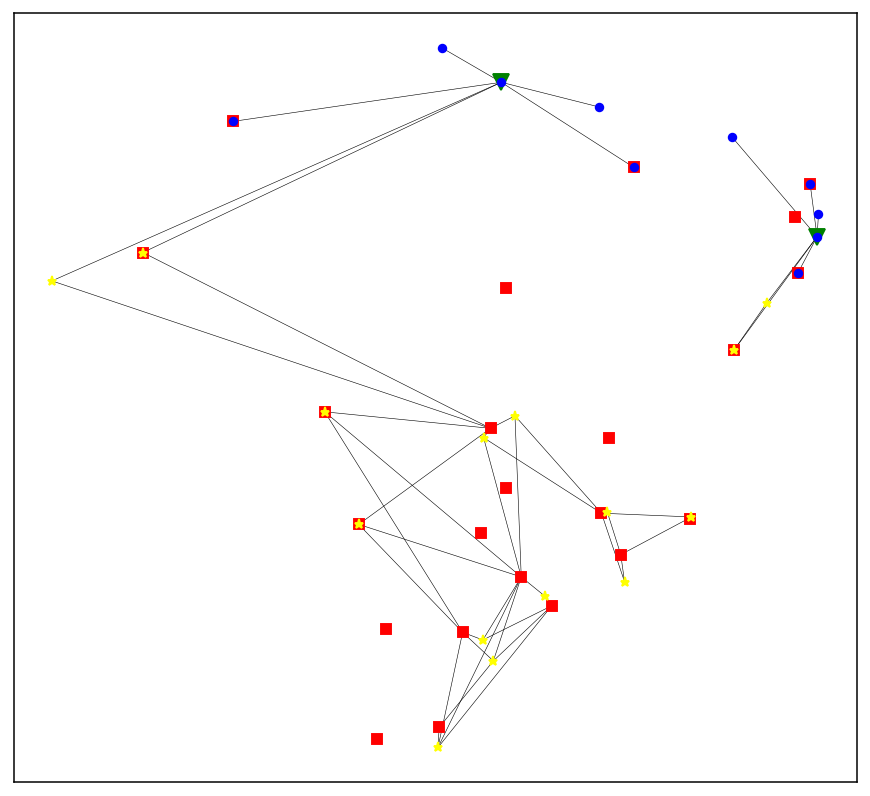

{   'active_warehouses_id': {19, 147},
    'active_warehouses_name': ['Belém', 'Recife'],
    'avg_customer_distance': 572.8930969875707,
    'avg_weighted_distance': 301.63043720087495,
    'customers_assignment': [   {   'Customer': 'Goiás Region',
                                    'Customer Demand': 2559855,
                                    'Customer_id': 11,
                                    'Customers Latitude': -16.72,
                                    'Customers Longitude': -49.26,
                                    'Distance': 54.7823545982479,
                                    'Warehouse': 'Anápolis',
                                    'Warehouse Latitude': -16.32,
                                    'Warehouse Longitude': -48.96,
                                    'Warehouse_id': 5},
                                {   'Customer': 'Distrito Federal Region',
                                    'Customer Demand': 2551909,
                                    'Custo

In [25]:
results = netopt(num_warehouses=5,
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 objective='mindistance',
                 force_uncapacitated=False,
                 distance_ranges=[0, 800, 1200],
                 plot=True,
                 warehouse_markersize=5,
                 warehouse_active_markersize=8)
print_dict(results)

The model in **infeasible** that is there is no solution.

Let's increase the capacity of all warehouses to 30.000.000 units and solve again.

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 290.0

Open warehouses:
ID: 164 City: Santos               State: Brazil Num. customers:   1  Outflow:  29029226.0 units
ID: 139 City: Ponta Grossa         State: Brazil Num. customers:   5  Outflow:  14712066.0 units
ID:  19 City: Belém                State: Brazil Num. customers:   7  Outflow:   7946863.0 units
ID: 147 City: Recife               State: Brazil Num. customers:   7  Outflow:  17936334.0 units
ID:  94 City: Juiz de Fora         State: Brazil Num. customers:   5  Outflow:  29042104.0 units

Total outflow: 98666593.0 units
% of demand in range     0 -   800: 91.0
% of demand in range   800 -  1200: 5.2
% of demand in range  1200 - 99999: 3.8
Most distant customer is at 2337.1016096586054
Average customers distance (no weights): 580.1116902937329


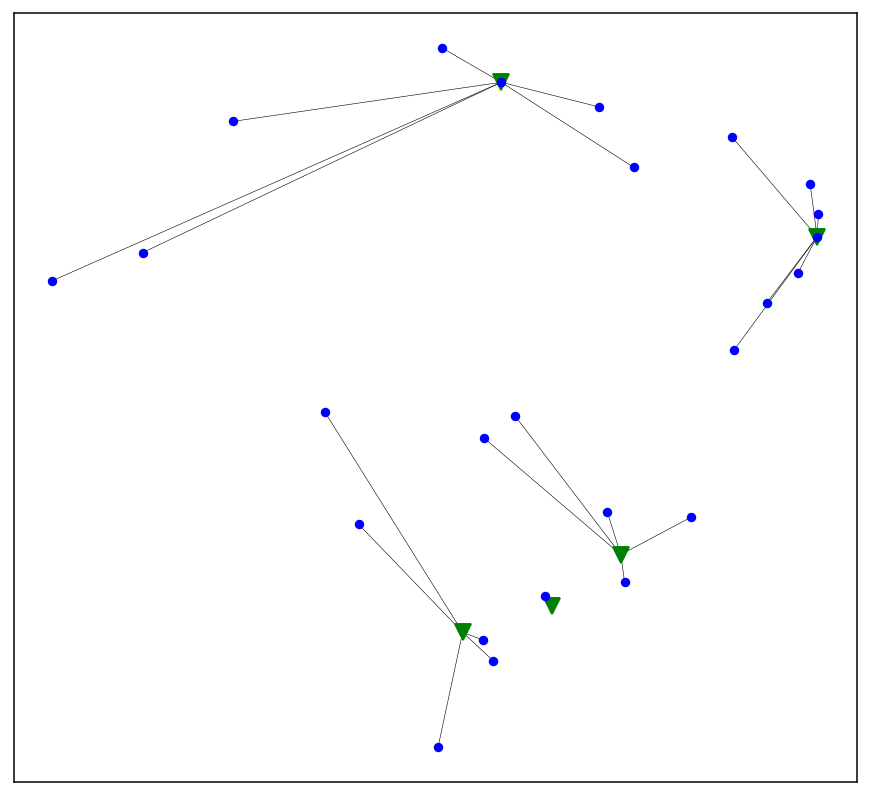

{   'active_warehouses_id': {164, 139, 19, 147, 94},
    'active_warehouses_name': [   'Santos',
                                  'Ponta Grossa',
                                  'Belém',
                                  'Recife',
                                  'Juiz de Fora'],
    'avg_customer_distance': 580.1116902937329,
    'avg_weighted_distance': 289.6113275934717,
    'customers_assignment': [   {   'Customer': 'Paraná Region',
                                    'Customer Demand': 4947330,
                                    'Customer_id': 5,
                                    'Customers Latitude': -25.42,
                                    'Customers Longitude': -49.29,
                                    'Distance': 94.8760455804776,
                                    'Warehouse': 'Ponta Grossa',
                                    'Warehouse Latitude': -25.09,
                                    'Warehouse Longitude': -50.16,
                                    'Wa

In [29]:
set_all_capacities(warehouses, 30_000_000)

results = netopt(num_warehouses=5,
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 objective='mindistance',
                 force_uncapacitated=False,
                 hide_inactive=True,
                 distance_ranges=[0, 800, 1200],
                 plot=True,
                 warehouse_markersize=5,
                 warehouse_active_markersize=8)
print_dict(results)

Now the model is feasible

**Remove the single-source constraint**

The model implicitly stipulates the single-source constraint (each customer is served by exactly one warehouse).
When dealing with capacities, it may be useful to relax this constraint to better exploit the available capacity.

To relax the single-source constraint set *force_single_sourcing=False*

We try solving again with capacity equal to 20.000.000 for all warehouses and no single-source constraint.

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 377.0

Open warehouses:
ID:  32 City: Campina Grande       State: Brazil Num. customers:   9  Outflow: 20000000.000733122 units
ID: 164 City: Santos               State: Brazil Num. customers:   1  Outflow: 19999999.92950984 units
ID:   5 City: Anápolis             State: Brazil Num. customers:  12  Outflow: 18666593.04317221 units
ID: 139 City: Ponta Grossa         State: Brazil Num. customers:   4  Outflow: 20000000.11960752 units
ID:  94 City: Juiz de Fora         State: Brazil Num. customers:   3  Outflow: 19999999.96503576 units

Total outflow: 98666593.05805844 units
% of demand in range     0 -   800: 75.0
% of demand in range   800 -  1200: 21.8
% of demand in range  1200 - 99999: 3.3
Most distant customer is at 2158.8019387391596
Average customers distance (no weights): 688.1676770498674

Customers served by more than one warehouse
- Customer 1 is served by 3 warehouses
- Cust

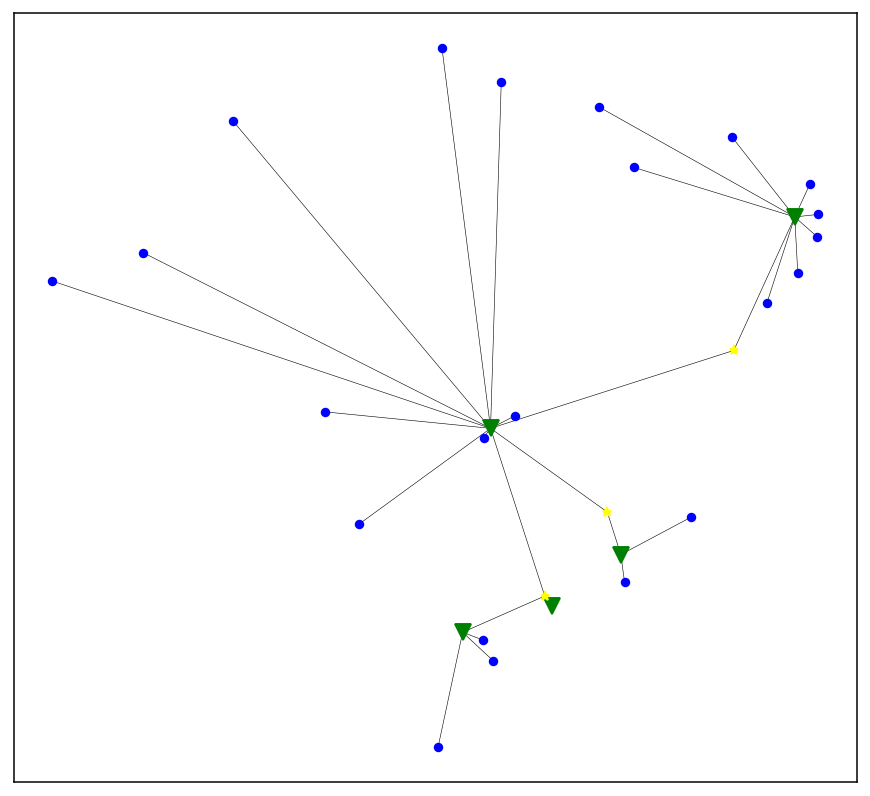

{   'active_warehouses_id': {32, 164, 5, 139, 94},
    'active_warehouses_name': [   'Campina Grande',
                                  'Santos',
                                  'Anápolis',
                                  'Ponta Grossa',
                                  'Juiz de Fora'],
    'avg_customer_distance': 688.1676770498674,
    'avg_weighted_distance': 467.5769285770816,
    'customers_assignment': [   {   'Customer': 'São Paulo Region',
                                    'Customer Demand': 29029226,
                                    'Customer_id': 1,
                                    'Customers Latitude': -23.53,
                                    'Customers Longitude': -46.63,
                                    'Distance': 837.8354867833733,
                                    'Warehouse': 'Anápolis',
                                    'Warehouse Latitude': -16.32,
                                    'Warehouse Longitude': -48.96,
                             

In [31]:
set_all_capacities(warehouses, 20_000_000)

results = netopt(num_warehouses=5,
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 objective='mindistance',
                 distance_ranges=[0, 800, 1200],
                 force_single_sourcing=False,
                 plot=True,
                 hide_inactive=True,
                 warehouse_markersize=5,
                 warehouse_active_markersize=8)
print_dict(results)

Now the model is feasible